In [3]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Collecting data from YouTube using YouTube API

In [4]:
api_key = '#######################################' # API key from google developer console

# channel_id of Alex_the_Analyst, Chandoo, Corey Scrafer, freecodecamp('UC8butISFwT-Wl7EV0hUK0BQ', techtfq, Luke Barousse, Zero analyst, Tech with Tim
channel_ids = ['UC7cs8q-gJRlGwj4A8OmCmXg','UC8uU_wruBMHeeRma49dtZKA','UCCezIgC97PvUuR4_gbFUs5g',
               'UCnz-ZXXER4jOvuED5trXfEA','UCLLw7jmFsvfIVaUFsLs8mlQ','UCD7FERT7OXNgLYkvEyy3qGQ','UC4JX40jDee_tINbkjycV4Sg'
               ] 
# https://developers.google.com/youtube/v3/docs/channels/list
# youtube = googleapiclient.discovery.build(api_service_name, api_version, credentials=credentials)
youtube = build('youtube','v3',developerKey=api_key)


In [5]:
def get_channel_stats(youtube, channel_ids):

    all_channel_data = []

    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id=','.join(channel_ids) # channel_ids is a list so joining the different ids with ','
    )
    response = request.execute()
    #print(response)

    for i in range(0,len(response['items'])):
        data = dict(channel_name = response['items'][i]['snippet']['title'],
                    Subscribers = response['items'][i]['statistics']['subscriberCount'],
                      Views = response['items'][i]['statistics']['viewCount'],
                      total_videos = response['items'][i]['statistics']['videoCount'],
                      playlist_ids = response['items'][i]['contentDetails']['relatedPlaylists']['uploads']
                      )
                    
        all_channel_data.append(data)
    

    return all_channel_data 

In [6]:
channel_stats = get_channel_stats(youtube, channel_ids)

# Converting the data collected from YouTube into pandas DataFrame

In [7]:
channel_data = pd.DataFrame(channel_stats)

In [8]:
channel_data

,channel_name,Subscribers,Views,total_videos,playlist_ids
0,Zero Analyst,21500,565739,286,UUD7FERT7OXNgLYkvEyy3qGQ
1,Chandoo,707000,53748537,505,UU8uU_wruBMHeeRma49dtZKA
2,Tech With Tim,1660000,161896060,1273,UU4JX40jDee_tINbkjycV4Sg
3,Corey Schafer,1400000,100113051,239,UUCezIgC97PvUuR4_gbFUs5g
4,techTFQ,350000,19856593,139,UUnz-ZXXER4jOvuED5trXfEA
5,Alex The Analyst,955000,44444369,342,UU7cs8q-gJRlGwj4A8OmCmXg
6,Luke Barousse,492000,24558059,162,UULLw7jmFsvfIVaUFsLs8mlQ


In [9]:
channel_data.dtypes

channel_name    object
Subscribers     object
Views           object
total_videos    object
playlist_ids    object
dtype: object

In [10]:
#converting dtypes into suitable format
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['total_videos'] = pd.to_numeric(channel_data['total_videos'])

In [11]:
channel_data.dtypes

channel_name    object
Subscribers      int64
Views            int64
total_videos     int64
playlist_ids    object
dtype: object

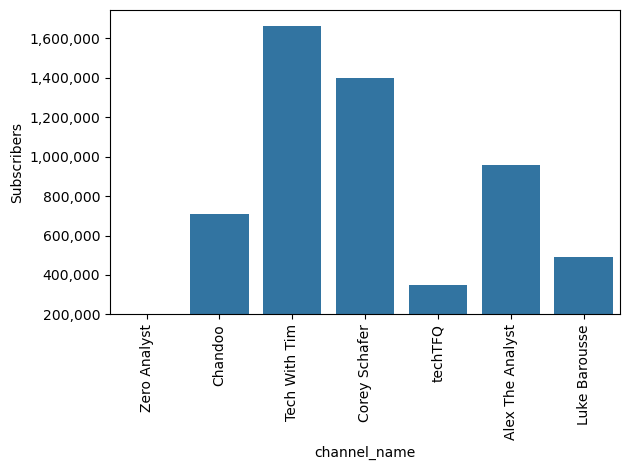

In [12]:


sns.barplot(data=channel_data, x='channel_name', y='Subscribers')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
# Set the y-axis to start at 20,000
plt.ylim(200000, None)  # None means the upper limit is set automatically

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


565739 161896060


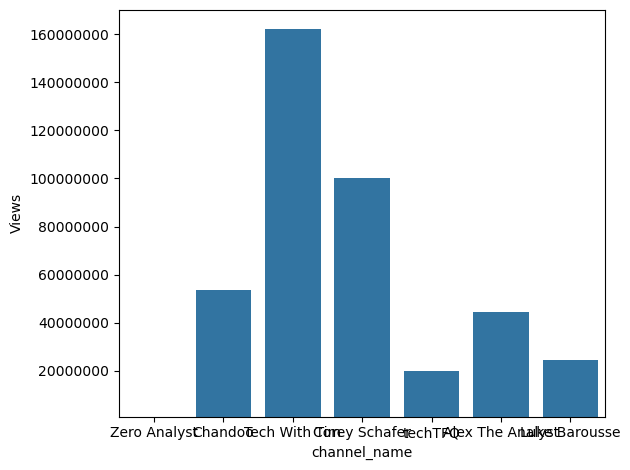

In [13]:
print(channel_data['Views'].min(),channel_data['Views'].max())
sns.barplot(data=channel_data, x='channel_name', y='Views')
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.0f}'))
# Set the y-axis to start at 20,000
plt.ylim(1000000, None)  # None means the upper limit is set automatically

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

139 1273


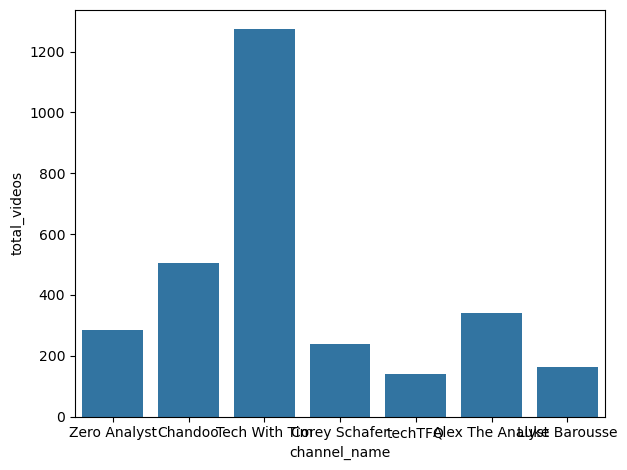

In [14]:
print(channel_data['total_videos'].min(),channel_data['total_videos'].max())
sns.barplot(data=channel_data, x='channel_name', y='total_videos')
# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

Function to get the video ids using playlist ids:

In [15]:
channel_data

,channel_name,Subscribers,Views,total_videos,playlist_ids
0,Zero Analyst,21500,565739,286,UUD7FERT7OXNgLYkvEyy3qGQ
1,Chandoo,707000,53748537,505,UU8uU_wruBMHeeRma49dtZKA
2,Tech With Tim,1660000,161896060,1273,UU4JX40jDee_tINbkjycV4Sg
3,Corey Schafer,1400000,100113051,239,UUCezIgC97PvUuR4_gbFUs5g
4,techTFQ,350000,19856593,139,UUnz-ZXXER4jOvuED5trXfEA
5,Alex The Analyst,955000,44444369,342,UU7cs8q-gJRlGwj4A8OmCmXg
6,Luke Barousse,492000,24558059,162,UULLw7jmFsvfIVaUFsLs8mlQ


In [16]:
#another way - channel_data.loc[channel_data['channel_name'] == 'Tech With Tim','playlist_ids'].iloc[0]
playlist_Id = channel_data.loc[channel_data['channel_name'] == 'Tech With Tim']['playlist_ids']

In [17]:
playlist_Id # playlist id of 'Tech with Tim'

2    UU4JX40jDee_tINbkjycV4Sg
Name: playlist_ids, dtype: object

In [18]:
#https://developers.google.com/youtube/v3/docs/playlistItems/list

def get_video_ids(youtube,playlist_id):

    request = youtube.playlistItems().list(part = 'contentDetails',playlistId = playlist_id, maxResults = 50) # default maxresults is 5, we're setting that to 50 per page

    response = request.execute()
    #print(response)

    video_ids = []
    for i in range(len(response['items'])): # storing the video ids of 1st 50 videos
        video_ids.append(response['items'][i]['contentDetails']['videoId'])

    next_page_token = response.get('nextPageToken') # to get the remaining videoids, we're using nextpage token to get all videoids from that playlist. if it reaches the last and didn't find the next id, get() will return none
    
    more_pages = True

    while more_pages:
        if next_page_token is None:
            more_pages=False
        else:
            request = youtube.playlistItems().list(part = 'contentDetails',playlistId = playlist_id, 
                                                   maxResults = 50,pageToken = next_page_token) # 

            response = request.execute() # executing the req for 50 results
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId']) # fetching the 50 video ids and storing them in a list

            next_page_token = response.get('nextPageToken')

    return video_ids

In [19]:
video_ids = get_video_ids(youtube,playlist_Id.iloc[0])

In [20]:
video_ids

['rkqbkhdvqMc',
 'p9rM7FLd1S8',
 'mcTPMwXCuN4',
 'ba3Qjv_fbVU',
 'hFMYoYULp-0',
 'GP9AXeobClk',
 '2mXmwsw88_A',
 'WWXqFj4o5tU',
 'cx0W2gKGzIE',
 'UtSSMs6ObqY',
 'Lu8E6Icalk8',
 'clDBdAFvIUk',
 'zFuANDkCtI4',
 'hV50TGITzaM',
 'ZIFgyM558nU',
 'becL7_JrHSo',
 'QXmJAmB5xLo',
 'PG-mg9nK6dY',
 'ysWPrgIbMNQ',
 'xy-yfmsXKwI',
 'oUogYblpB9E',
 'OE-SFJEil0s',
 'A51gXc2oTv8',
 'zb_6H6rKiRk',
 'jJTV6EGUtjk',
 'qX3Dq8p7x0Y',
 'E7DNvJduHjM',
 '71-XeR-r1aA',
 'oI7D3iwYBIM',
 '6wnLAAosUL0',
 'bp1gWyUv-M4',
 'N2vE2bP5Mok',
 's4gce1IFGcc',
 'ZW4p6xYkNgE',
 'yjQx31i--DA',
 'pg6a6wHhSeQ',
 'jtTglR0EwI4',
 'wnzqs4COa80',
 'XV9EAWqbxMw',
 'aAvYXkc8XqU',
 '1hRkKTv8LEI',
 'RGmwz1vahuk',
 'bPLr0onDA_k',
 'aT175p57kCI',
 'qqp6QN20CpE',
 '_ah7rll_Jik',
 'kLn9OUPTo9I',
 '4hNDC7F3BW0',
 'xk_WqFmw8ss',
 '0NBFsaPy_rQ',
 'KwKaQNBAxh4',
 'AfkThO18cxc',
 'M_EmE5xdUvg',
 'qIOoX85v7vs',
 's75WI6rOUfI',
 'PF5SrWbQ8nY',
 '4SJv8YxGho4',
 'J2qL7fuz1MY',
 'sQd2NRrtGgs',
 '4IUxx4UmpWQ',
 'd_Ay2dKrQgA',
 '1uJVLhv5EcE',
 'dkC244

Function to get the video details using the video ids

In [21]:
def get_video_details(youtube, video_ids):

    all_video_stats = []

    for i in range(0, len(video_ids),50):  # youtube has restricted to pass only 50 ids at a time. so using loop that goes from 0 to len(videoids) with a step size of 50 
        request = youtube.videos().list(
            part="snippet,statistics",
            id=",".join(video_ids[i:i+50])  # at 1st iter, it fetches 0:50
        )
        response = request.execute()
        #print(response)

        for video in response['items']:  # looping the response object to get the stats for the processed 50 ids
            video_stats = dict(Title=video['snippet']['title'],
                               published_date=video['snippet']['publishedAt'],
                               Views=video['statistics']['viewCount'],
                               Likes=video['statistics']['likeCount'],
                               favourites=video['statistics']['favoriteCount'],
                               Comment=video['statistics']['commentCount']
                               )
            all_video_stats.append(video_stats)

    return all_video_stats

In [23]:
video_stats = get_video_details(youtube,video_ids)

In [24]:
video_stats

[{'Title': 'How to outsmart automated systems when applying for TECH jobs💪💻',
  'published_date': '2025-01-17T07:13:35Z',
  'Views': '1310',
  'Likes': '115',
  'favourites': '0',
  'Comment': '3'},
 {'Title': 'This is definitely the hardest passive income HUSTLE to break into.',
  'published_date': '2025-01-16T19:46:32Z',
  'Views': '1756',
  'Likes': '111',
  'favourites': '0',
  'Comment': '1'},
 {'Title': 'Is Python Still The King Of Coding?!👈⌨️',
  'published_date': '2025-01-16T06:08:19Z',
  'Views': '10833',
  'Likes': '542',
  'favourites': '0',
  'Comment': '29'},
 {'Title': "Concept we're looking at today is Dynamic Typing In Python💻",
  'published_date': '2025-01-15T21:30:35Z',
  'Views': '4510',
  'Likes': '257',
  'favourites': '0',
  'Comment': '6'},
 {'Title': 'Next Income Method looks at 👉Blogging.Affiliate Marketing & Newsletters in 2025💻',
  'published_date': '2025-01-15T05:31:26Z',
  'Views': '2566',
  'Likes': '130',
  'favourites': '0',
  'Comment': '1'},
 {'Title':

In [25]:
video_stats_df = pd.DataFrame(video_stats)

In [26]:
video_stats_df

,Title,published_date,Views,Likes,favourites,Comment
0,How to outsmart automated systems when applyin...,2025-01-17T07:13:35Z,1310,115,0,3
1,This is definitely the hardest passive income ...,2025-01-16T19:46:32Z,1756,111,0,1
2,Is Python Still The King Of Coding?!👈⌨️,2025-01-16T06:08:19Z,10833,542,0,29
3,Concept we're looking at today is Dynamic Typi...,2025-01-15T21:30:35Z,4510,257,0,6
4,Next Income Method looks at 👉Blogging.Affiliat...,2025-01-15T05:31:26Z,2566,130,0,1
...,...,...,...,...,...,...
1269,Python Programming Tutorial #4 - IF/ELIF/ELSE,2017-06-12T18:00:04Z,79201,1898,0,68
1270,Python Programming Tutorial #3 - Conditions,2017-06-11T18:07:42Z,86822,2151,0,26
1271,Python Programming Tutorial #2 - Basic Operato...,2017-06-10T20:48:25Z,126764,2709,0,75
1272,Python Programming Tutorial #1 - Variables and...,2017-06-10T02:01:57Z,395304,6454,0,132


In [33]:
video_stats_df.dtypes

Title             object
published_date    object
Views              int64
Likes              int64
favourites         int64
Comment            int64
dtype: object

In [34]:
video_stats_df['published_date'] = pd.to_datetime(video_stats_df['published_date']).dt.date
video_stats_df['Views'] = pd.to_numeric(video_stats_df['Views'])
video_stats_df['Likes'] = pd.to_numeric(video_stats_df['Likes'])
video_stats_df['favourites'] = pd.to_numeric(video_stats_df['favourites'])
video_stats_df['Comment'] = pd.to_numeric(video_stats_df['Comment'])

In [32]:
video_stats_df.dtypes

Title             object
published_date    object
Views              int64
Likes              int64
favourites         int64
Comment            int64
dtype: object

In [35]:
video_stats_df

,Title,published_date,Views,Likes,favourites,Comment
0,How to outsmart automated systems when applyin...,2025-01-17,1310,115,0,3
1,This is definitely the hardest passive income ...,2025-01-16,1756,111,0,1
2,Is Python Still The King Of Coding?!👈⌨️,2025-01-16,10833,542,0,29
3,Concept we're looking at today is Dynamic Typi...,2025-01-15,4510,257,0,6
4,Next Income Method looks at 👉Blogging.Affiliat...,2025-01-15,2566,130,0,1
...,...,...,...,...,...,...
1269,Python Programming Tutorial #4 - IF/ELIF/ELSE,2017-06-12,79201,1898,0,68
1270,Python Programming Tutorial #3 - Conditions,2017-06-11,86822,2151,0,26
1271,Python Programming Tutorial #2 - Basic Operato...,2017-06-10,126764,2709,0,75
1272,Python Programming Tutorial #1 - Variables and...,2017-06-10,395304,6454,0,132


In [36]:
# most viewed 10 videos of Tim
top10_videos= video_stats_df.sort_values(by = 'Views',ascending=False)[:10]

In [37]:
top10_videos

,Title,published_date,Views,Likes,favourites,Comment
966,12 Hour Coding Livestream - Creating an Online...,2019-10-18,10960116,214421,0,3199
895,Python Object Oriented Programming (OOP) - For...,2020-03-29,3524267,97140,0,2660
745,"Python Website Full Tutorial - Flask, Authenti...",2021-02-01,3176780,63320,0,2566
681,5 Mini Python Projects - For Beginners,2021-06-10,2911387,71571,0,1969
1006,Python Flappy Bird AI Tutorial (with NEAT) - C...,2019-08-10,2383707,26319,0,352
1027,15 Python Projects in Under 15 Minutes (Code I...,2019-06-27,2080182,57781,0,1104
520,Learn Python With This ONE Project!,2022-09-24,1948709,69365,0,1063
801,Python As Fast as Possible - Learn Python in ~...,2020-10-04,1902829,55515,0,1382
1167,How to Convert any Python File to .EXE,2018-11-28,1855305,48256,0,2409
693,Automate Excel With Python - Python Excel Tuto...,2021-05-13,1649382,29935,0,646


<Axes: xlabel='Views', ylabel='Title'>

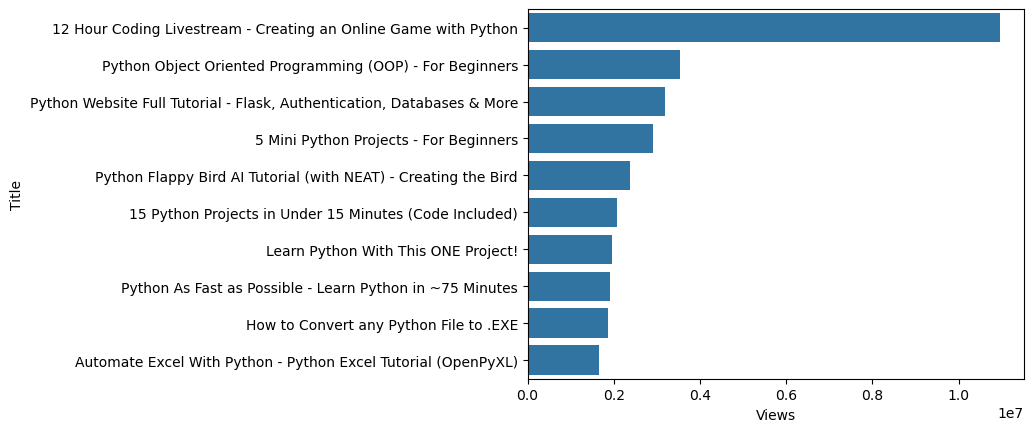

In [38]:
sns.barplot(data = top10_videos, x='Views', y='Title')

In [42]:
video_stats_df.dtypes

Title             object
published_date    object
Views              int64
Likes              int64
favourites         int64
Comment            int64
dtype: object

In [43]:
video_stats_df['published_date'] = pd.to_datetime(video_stats_df['published_date'])


In [44]:
video_stats_df['published_year'] = video_stats_df['published_date'].dt.year

In [45]:
video_stats_df

,Title,published_date,Views,Likes,favourites,Comment,published_year
0,How to outsmart automated systems when applyin...,2025-01-17,1310,115,0,3,2025
1,This is definitely the hardest passive income ...,2025-01-16,1756,111,0,1,2025
2,Is Python Still The King Of Coding?!👈⌨️,2025-01-16,10833,542,0,29,2025
3,Concept we're looking at today is Dynamic Typi...,2025-01-15,4510,257,0,6,2025
4,Next Income Method looks at 👉Blogging.Affiliat...,2025-01-15,2566,130,0,1,2025
...,...,...,...,...,...,...,...
1269,Python Programming Tutorial #4 - IF/ELIF/ELSE,2017-06-12,79201,1898,0,68,2017
1270,Python Programming Tutorial #3 - Conditions,2017-06-11,86822,2151,0,26,2017
1271,Python Programming Tutorial #2 - Basic Operato...,2017-06-10,126764,2709,0,75,2017
1272,Python Programming Tutorial #1 - Variables and...,2017-06-10,395304,6454,0,132,2017


published_year
2024    290
2019    212
2023    175
2021    173
2020    166
2018     94
2022     90
2025     37
2017     37
Name: count, dtype: int64


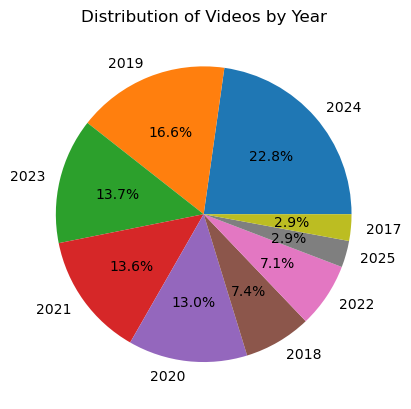

In [49]:
# Count the number of videos published each year
year_counts = video_stats_df['published_year'].value_counts()
print(year_counts)

plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%')

plt.title('Distribution of Videos by Year')

plt.show()

In [59]:
# Video uploads in Month wise
video_stats_df['published_Month'] = pd.to_datetime(video_stats_df['published_date']).dt.strftime('%b')

In [60]:
video_stats_df.sample(20)

,Title,published_date,Views,Likes,favourites,Comment,published_year,published_Month
148,Tutorial: Ever written code like this?,2024-11-11,37414,1855,0,39,2024,Nov
272,10 Useful Python Modules You NEED to Know,2024-06-21,38890,1888,0,68,2024,Jun
1152,How to Install TensorFlow GPU on Windows - FUL...,2018-12-21,180253,2409,0,350,2018,Dec
1043,Tensorflow 2.0 Tutorial - Saving & Loading Mod...,2019-05-12,29159,655,0,96,2019,May
200,What is your thought process when you code?💭,2024-10-19,5455,361,0,8,2024,Oct
217,How do you familiarise yourself with a new top...,2024-10-12,4652,251,0,3,2024,Oct
1091,Python Online Game Tutorial #2 - Creating a Se...,2019-03-01,68240,1262,0,101,2019,Mar
422,TypeScript Tutorial For Beginners,2023-04-18,25998,948,0,37,2023,Apr
1126,Java Tutorial for Beginners #22 - Enums,2019-01-15,5331,122,0,19,2019,Jan
714,Python Beginner Project Tutorial - Turtle Racing!,2021-03-27,61843,2022,0,99,2021,Mar


In [63]:
videos_per_month = video_stats_df.groupby('published_Month',as_index=False).size()

In [64]:
videos_per_month

,published_Month,size
0,Apr,93
1,Aug,61
2,Dec,145
3,Feb,105
4,Jan,138
5,Jul,64
6,Jun,93
7,Mar,108
8,May,104
9,Nov,135


In [65]:
sort_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [71]:
videos_per_month['published_Month'] = pd.Categorical(videos_per_month['published_Month'], categories=sort_order, ordered=True)
videos_per_month = videos_per_month.sort_values('published_Month')

In [72]:
videos_per_month

,published_Month,size
4,Jan,138
3,Feb,105
7,Mar,108
0,Apr,93
8,May,104
6,Jun,93
5,Jul,64
1,Aug,61
11,Sep,75
10,Oct,153


<Axes: xlabel='published_Month', ylabel='size'>

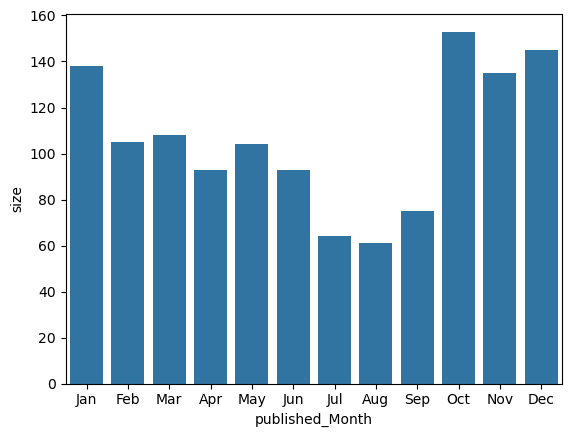

In [73]:
sns.barplot(x='published_Month',y='size',data = videos_per_month)

In [74]:
# loading the above df to csv files

video_stats_df.to_csv('YTVideo_details_of_TechWithTim.csv')